In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ara_plumes import models, utils
import numpy as np

## Figure 1 for Plume Thrust 1

In [5]:
img_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0222.png"

img_path2 = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0252.png"

img_path3 = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0272.png"

img_path4 = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0292.png"

imgs_to_read = [
    "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0222.png",
    "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0252.png",
    "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0272.png",
    "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0292.png"
]


leak_source = (1590, 1010)

# Path doesn't really matter--only need arg to instantitate plume object
vid_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/high_1.MP4"
plume_learner = models.PLUME(video_path=vid_path)
plume_learner.orig_center = leak_source


# Have to run through concentric_circle to get the plotting data

frame = cv2.imread(img_path)
output=plume_learner.concentric_circle(
    img=frame,
    scatter_points=True,
    plume_contour=True, # This was added into source-- but probably not necessary anymore
    boundary_ring=True,
    fit_poly=True,
    num_of_circs=22
)
plotting_data= output[-1]


# cropping values
y1 = 200
y2 = 1080
x1 = 250
x2 = 1255
cropping_dimension = [y1,y2,x1,x2]

In [ ]:
frame=cv2.imread(img_path)
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

frame_11 = np.fliplr(frame)
frame_11_crop = frame_11[y1:y2, x1:x2]

plt.imshow(frame_11)
plt.show()

##
frame=cv2.imread(img_path2)
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

frame_12 = np.fliplr(frame)
frame_12_crop = frame_12[y1:y2, x1:x2]

##
frame=cv2.imread(img_path3)
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

frame_13 = np.fliplr(frame)
frame_13_crop = frame_13[y1:y2, x1:x2]

##
frame=cv2.imread(img_path4)
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

frame_14 = np.fliplr(frame)
frame_14_crop = frame_14[y1:y2, x1:x2]


In [ ]:
frame=cv2.imread(img_path)
# print(frame)
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

norm = plt.Normalize(vmin=frame.min(), vmax=frame.max())
cm = plt.cm.viridis
frame = cm(norm(frame))[:,:,:3]

frame_21 = frame.copy()

frame_21 = (frame_21 * 255).astype(np.uint8)

cv2.circle(
    frame_21,
    center = leak_source,
    radius = 50,
    color=(255,0,0),
    thickness=3,
    lineType=cv2.LINE_AA
)

## testing to see if I can plot concentric circle

frame_21 = np.fliplr(frame_21)

frame_21_crop = frame_21[y1:y2, x1:x2] 

plt.imshow(frame_21_crop)
plt.show()

In [ ]:
frame = cv2.imread(img_path)
output = plume_learner.concentric_circle(
    img=frame,
    scatter_points=False,
    plume_contour=True,
    boundary_ring=True,
    fit_poly=False,
    num_of_circs=28
)
new_frame = output[0]

# new_frame=cv2.cvtColor(new_frame,cv2.COLOR_BGR2GRAY)

frame_22 = np.fliplr(new_frame)
frame_22_crop = frame_22[y1:y2, x1:x2]

plt.imshow(frame_22)
plt.show()

In [ ]:
frame = cv2.imread(img_path)
output = plume_learner.concentric_circle(
    img=frame,
    fit_poly=False,
    boundary_ring=True,
    num_of_circs=28
)
new_frame = output[0]

# new_frame=cv2.cvtColor(new_frame,cv2.COLOR_BGR2GRAY)

frame_23 = np.fliplr(new_frame)
frame_23_crop = frame_23[y1:y2, x1:x2]

plt.imshow(frame_23,cmap=None)
plt.show()

In [ ]:
frame = cv2.imread(img_path)
output = plume_learner.concentric_circle(
    img=frame,
    fit_poly=True,
    boundary_ring=False,
    num_of_circs=22
)
new_frame = output[0]
new_frame=cv2.cvtColor(new_frame,cv2.COLOR_BGR2GRAY)

frame_24 = np.fliplr(new_frame)
frame_24_crop = frame_24[y1:y2, x1:x2]


plt.imshow(frame_24,cmap=None)
plt.show()

### Putting figures together into plot

In [8]:
# Assuming img1, img2, img3, img4 are your numpy arrays representing images
# Replace these with your actual numpy arrays
img1 = frame_11_crop
img2 = frame_12_crop
img3 = frame_13_crop
img4 = frame_14_crop

# Set the overall size of the figure
fig, axes = plt.subplots(3, 4, figsize=(25, 17))  # Adjust the width and height as needed

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.2)

# Plot the images
axes[0,0].imshow(img1)
# axes[0].set_title('Image 1')
axes[0,0].axis('off')  

axes[0,1].imshow(img2)
# axes[1].set_title('Image 2')
axes[0,1].axis('off')

axes[0,2].imshow(img3)
# axes[2].set_title('Image 3')
axes[0,2].axis('off')

axes[0,3].imshow(img4)
# axes[3].set_title('Image 4')
axes[0,3].axis('off')


axes[1,0].imshow(frame_21_crop, cmap="gray")
# axes[3].set_title('Image 4')
axes[1,0].axis('off')

axes[1,1].imshow(frame_22_crop)
# axes[3].set_title('Image 4')
axes[1,1].axis('off')

axes[1,2].imshow(frame_23_crop)
# axes[3].set_title('Image 4')
axes[1,2].axis('off')

axes[1,3].imshow(frame_24_crop)
# axes[3].set_title('Image 4')
axes[1,3].axis('off')
# Adjust layout to prevent clipping of titles

# Add blank plots in the third row
for col in range(4):
    axes[2, col].axis('off')


plt.tight_layout()

# Show the plot
plt.show()

NameError: name 'frame_11_crop' is not defined

## Helper Functions

In [129]:
def convert_to_heatmap(img):
    img = img.copy()

    # convert to gray
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # get norm and color_map 
    norm = plt.Normalize(vmin=img_gray.min(), vmax=img_gray.max())
    cm = plt.cm.viridis

    # Apply heatmap
    img_cmap = cm(norm(img_gray))[:,:,:3]

    img_cmap = (img_cmap* 255).astype(np.uint8)

    return img_cmap

def add_plume_contour(
        img,
        selected_contours
):
    img = img.copy()
    thickness = 3
    blue_color = (190,238,251)
    blue_color = (132,185,199)
    blue_color = (20,185,230)
    cv2.drawContours(
        img,
        selected_contours,
        -1,
        blue_color,
        thickness
    )
    return img

def add_concentric_circle(
        img,
        orig_center,
        radii=50,
        num_of_circ=25,
):
    """
    Parameters:
    ----------
        img: np.ndarray
    """

    # Convert to correct type
    img = img.copy()
    # print(img)
    # img = (img* 255).astype(np.uint8)
    thickness =3
    red_color = (190,238,251)
    red_color = (132,185,199)
    red_color = (20,185,230)
    for step in range(1, num_of_circ+1):
        radius = radii*step
        cv2.circle(
            img,
            center=orig_center,
            radius=radius,
            color=red_color,
            thickness=thickness,
            lineType=cv2.LINE_AA
        )

    return img

def add_scatter_points(
        img,
        plotting_data
):
    img = img.copy()

    points_mean = plotting_data[1]
    points_var1 = plotting_data[2]
    points_var2 = plotting_data[3]
    red_color = (255,0,0)
    thickness = 9
    for point in points_mean.astype(int):
        cv2.circle(
            img,
            point,
            thickness,
            red_color,
            -1   
        )
    
    for point in points_var1:
        cv2.circle(
            img,
            point,
            thickness,
            red_color,
            -1
        )

    for point in points_var2:
        cv2.circle(
            img,
            point,
            thickness,
            red_color,
            -1
        )        

    return img

def add_poly_curves(
        img,
        plotting_data
):
    img = img.copy()

    # mean polynomial
    mean_curve_img = plotting_data[-3]
    img = cv2.addWeighted(
        img, 1, mean_curve_img, 1,0
    )
    return img

def create_fig(
        frame,
        plotting_data,
        leak_source,
        heatmap=True,
        contour=True,
        concentric_circ=True,
        scatter = True,
        poly = True,
        flip_img = True,
        crop = True,
        cropping_dimension = cropping_dimension,
):
    frame = frame.copy()

    if heatmap is True:
        frame = convert_to_heatmap(frame)
    
    if contour is True:
        frame = add_plume_contour(frame, selected_contours=plotting_data[0])
    
    if concentric_circ is True:
        frame = add_concentric_circle(frame, leak_source)
    
    if scatter is True:
        frame = add_scatter_points(frame, plotting_data)
    
    if poly is True:
        frame = add_poly_curves(frame, plotting_data)

    if flip_img is True:
        frame = np.fliplr(frame)

    # crop image
    if crop is True:
        y1, y2, x1,x2 = cropping_dimension
        frame = frame[y1:y2, x1:x2]
    
    return frame

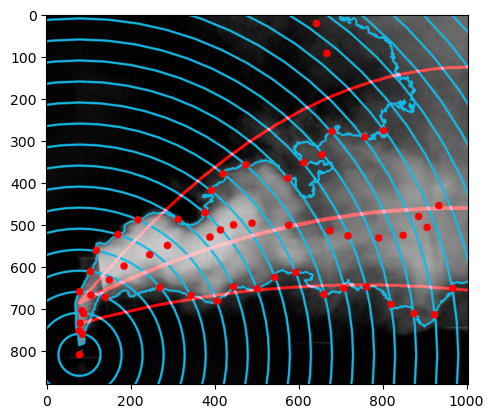

In [130]:
frame = cv2.imread(img_path)

new_frame = create_fig(
    frame,
    plotting_data, 
    leak_source,
    heatmap=False,
    contour=True,
    concentric_circ=True,
    scatter=True,
    poly=True
)


plt.imshow(new_frame)
plt.show()

In [131]:
# Generate all figures to plot
first_row = []
heat_vals = [False, False, False, False]
# heat_vals = [True, True, True, True]
i = 0
for img in imgs_to_read:
    frame = cv2.imread(img)
    frame = create_fig(frame, plotting_data, leak_source,
                       heatmap=heat_vals[i],
                       contour=False,
                       concentric_circ=False,
                       scatter=False,
                       poly=False)
    i+=1
    first_row.append(frame)

second_row = []
heat_vals = [False, False, False, False]
# heat_vals = [True, True, True, True]
con_cir_vals = [False, True, True, True]
contour_vals = [True, True, True, True]
scatter_vals = [False, False, True, True]
poly_vals = [False, False, False, True]

for i in range(len(heat_vals)):
    frame = cv2.imread(imgs_to_read[0])
    frame = create_fig(frame, plotting_data, leak_source,
                       heatmap=heat_vals[i],
                       contour=contour_vals[i],
                       concentric_circ=con_cir_vals[i],
                       scatter=scatter_vals[i],
                       poly=poly_vals[i]
                       )
    second_row.append(frame)

figs_to_plot = [first_row,second_row]



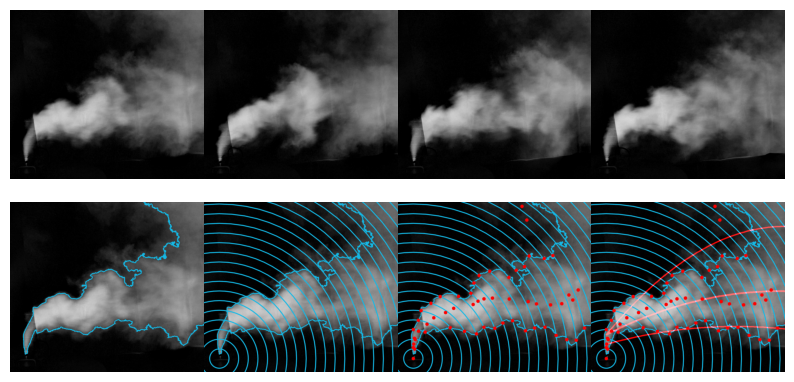

In [132]:
num_rows = 2
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

for row in range(num_rows):
    for col in range(num_cols):
        axes[row,col].imshow(figs_to_plot[row][col])
        axes[row,col].axis('off')
plt.subplots_adjust(wspace=0, hspace=0)

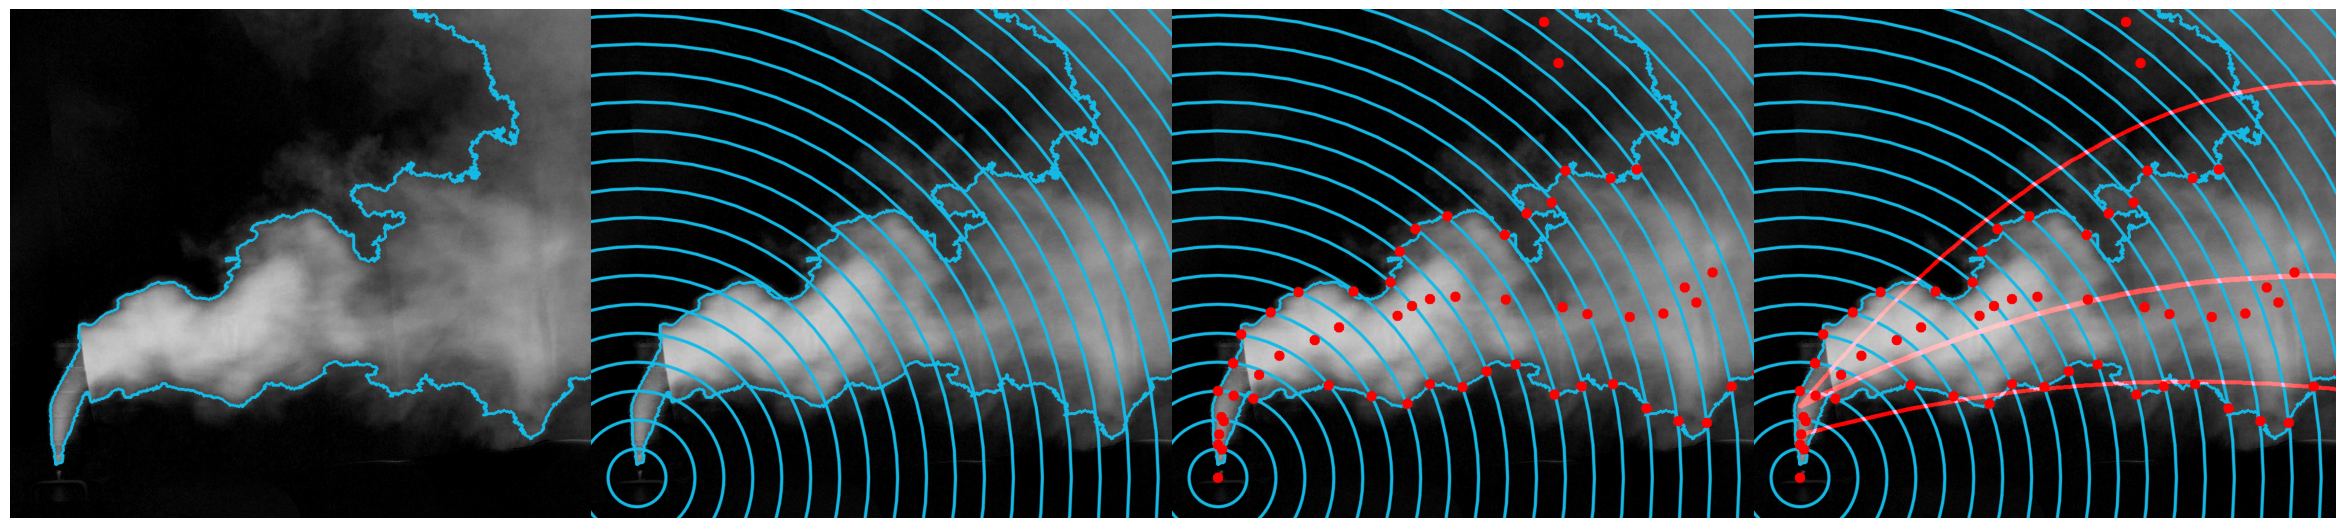

In [133]:
num_rows = 1
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 20))

for row in range(num_rows):
    for col in range(num_cols):
        axes[col].imshow(figs_to_plot[row+1][col])
        axes[col].axis('off')
plt.subplots_adjust(wspace=0, hspace=0)

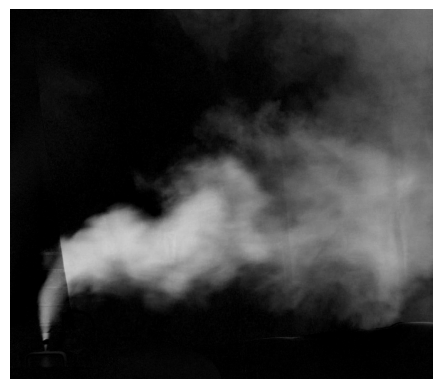

In [126]:
frame = cv2.imread(imgs_to_read[0])
frame = np.fliplr(frame)
frame = frame[y1:y2, x1:x2]
plt.imshow(frame)
plt.axis('off')
plt.show()

# Before and after frames for figure

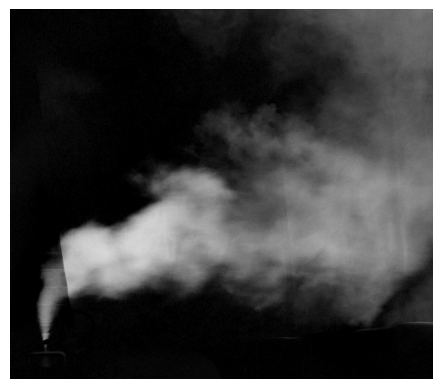

In [12]:
img_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0219.png"

frame = cv2.imread(img_path)

frame = np.fliplr(frame)
frame = frame[y1:y2, x1:x2]
plt.imshow(frame)
plt.axis('off')
plt.show()

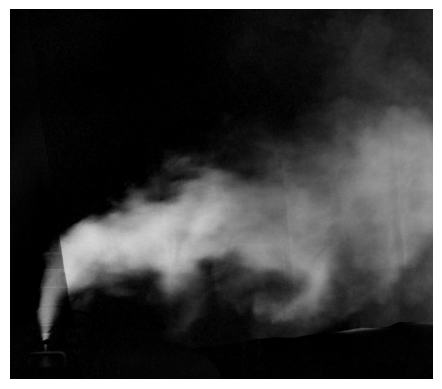

In [13]:
img_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes-Malachite-Orig-Repo/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0335.png"

frame = cv2.imread(img_path)

frame = np.fliplr(frame)
frame = frame[y1:y2, x1:x2]
plt.imshow(frame)
plt.axis('off')
plt.show()